In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
PHI_GOLD = (1 + np.sqrt(5)) / 2

def piccini_phyllotaxis(n, nint):
    spokes_per_int = round(n/nint)
    traj_tmp = np.zeros((n, 3))
    traj = np.zeros((n, 3))

    for i in range(n):
        if i < n/2:
            theta_n = np.pi/2 * np.sqrt(1.0*i/(n/2.0))
            gz_sign = 1
        else:
            theta_n = np.pi/2 * np.sqrt((n-i)/(n/2.0))
            gz_sign = -1

        phi_n = i * PHI_GOLD
        traj_tmp[i, 0] = np.sin(theta_n) * np.cos(phi_n)
        traj_tmp[i, 1] = np.sin(theta_n) * np.sin(phi_n)
        traj_tmp[i, 2] = gz_sign * np.cos(theta_n)

    for i in range(nint):
        if i % 2 == 0:
            for j in range(spokes_per_int):
                idx1 = i * spokes_per_int + j
                idx2 = i + j * nint
                traj[idx1, :] = traj_tmp[idx2, :]
        else:
            for j in range(spokes_per_int):
                idx1 = i * spokes_per_int + j
                idx2 = (n - (nint - i)) - j * nint
                traj[idx1, :] = traj_tmp[idx2, :]

    return traj


In [37]:
# def nearest_fibonacci(n):
#     """Finds the nearest Fibonacci number greater than or equal to n."""
#     a, b = 0, 1
#     while b < n:
#         a, b = b, a + b
#     return b

def compute_single_spiral_spokes(dim):
    """Computes the required number of spokes for a single continuous spiral in an image of size dim x dim x dim."""
    total_spokes = int(dim**2 * np.pi)  # Nyquist criterion
    interleaves = 1  # Force a single continuous spiral
    return total_spokes, interleaves

# Example usage for 250 x 250 x 250 image
fov = 10;
n, nint = compute_single_spiral_spokes(fov)
nint = 1
print(f"Recommended parameters: ({n}, {nint})")
print(n)



Recommended parameters: (314, 1)
314


In [38]:
traj = piccini_phyllotaxis(n, nint)

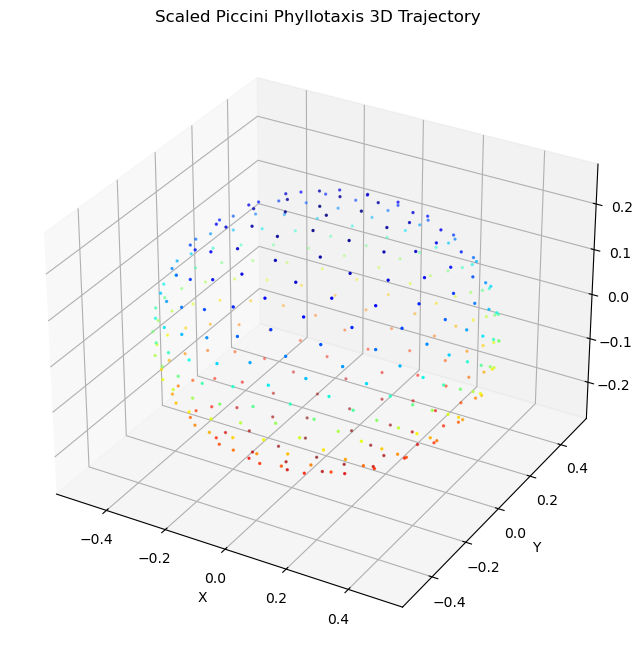

In [39]:
# Define Golden Ratio and Golden Angle
PHI_GOLD = (1 + np.sqrt(5)) / 2  # Golden Ratio
GOLDEN_ANGLE = 2 * np.pi * (1 - (1 / PHI_GOLD))  # Golden Angle in radians

# Ensure even number of spokes per interleave
spokes_per_int = int(np.ceil(n / nint))
# print(spokes_per_int)
# if spokes_per_int % 2 != 0:
#     spokes_per_int += 1  
res = 1
max_radius = 0.5/res

# Ensure even number of spokes per interleave
spokes_per_int = int(np.ceil(n / nint))

# Ensure even number of spokes per interleave
spokes_per_int = int(np.ceil(n / nint))

# Initialize trajectory arrays
traj_tmp = np.zeros((n, 3))
traj = np.zeros((n, 3))

# Generate the initial trajectory
for i in range(n):
    if i < n / 2:
        theta_n = np.pi / 2 * np.sqrt(i / (n / 2))
        gz_sign = max_radius
    else:
        theta_n = np.pi / 2 * np.sqrt((n - i) / (n / 2))
        gz_sign = -max_radius

    phi_n = i * GOLDEN_ANGLE
    traj_tmp[i, 0] = np.sin(theta_n) * np.cos(phi_n)
    traj_tmp[i, 1] = np.sin(theta_n) * np.sin(phi_n)
    traj_tmp[i, 2] = gz_sign * np.cos(theta_n)

# Reorder for interleaves
for i in range(nint):
    if i % 2 == 0:
        for j in range(spokes_per_int):
            idx1 = i * spokes_per_int + j
            idx2 = i + j * nint
            traj[idx1, :] = traj_tmp[idx2, :]
    else:
        for j in range(spokes_per_int):
            idx1 = i * spokes_per_int + j
            idx2 = (n - (nint - i)) - j * nint
            traj[idx1, :] = traj_tmp[idx2, :]

# Calculate the distance of each point from the origin (0, 0, 0)
distances = np.linalg.norm(traj, axis=1)

# Find the maximum distance
max_distance = np.max(distances)

# Calculate the scaling factor to ensure the trajectory fits within the max radius
scaling_factor = max_radius / max_distance

# Apply the scaling factor to all points
traj_scaled = traj * scaling_factor

# Plot the scaled trajectory
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(traj_scaled[:, 0], traj_scaled[:, 1], traj_scaled[:, 2], c=np.arange(n), cmap='jet', s=2)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Scaled Piccini Phyllotaxis 3D Trajectory")
plt.show()


In [40]:
print(traj.shape)

(314, 3)


In [41]:
#print(traj)

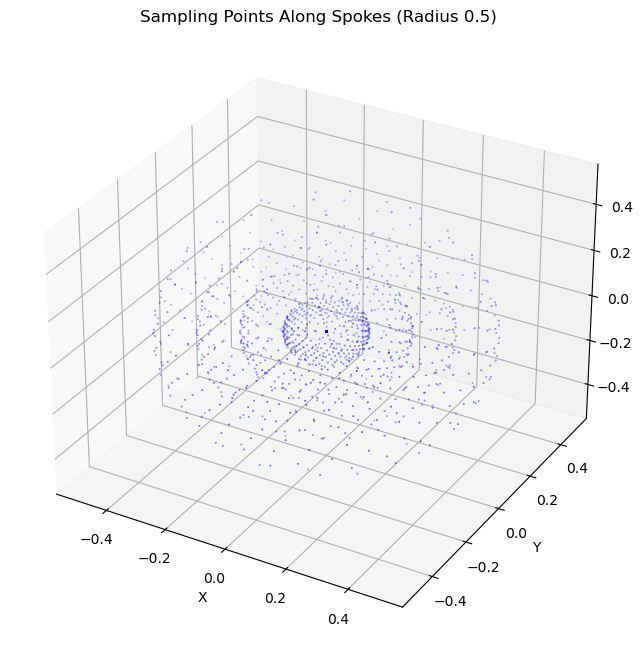

In [45]:
# Calculate the sampling distance between points along each spoke
sampling_distance = 1 / fov  # This is the distance between each sampling point

# Calculate the number of samples per spoke based on the max radius and the sampling distance
num_samples_per_spoke = int(np.round(max_radius / sampling_distance))

# Initialize an array to store the sampling points along all spokes
sampling_points = []

# Loop through each spoke in the trajectory
for i in range(n):
    # Get the direction of the spoke (from center to the point on the sphere)
    spoke_direction = traj[i]  # (x, y, z) for the current spoke
    
    # Compute the current radius of the point in the trajectory
    current_radius = np.linalg.norm(spoke_direction)
    
    # Normalize the direction of the spoke to ensure it ends at max_radius (0.5)
    spoke_direction_normalized = spoke_direction / current_radius * max_radius
    
    # Generate evenly spaced points along this spoke, from 0 to 1 (from center to max_radius)
    # We will scale the vector by a factor between 0 and 1
    spoke_points = np.linspace(0, 1, num_samples_per_spoke)[:, None] * spoke_direction_normalized

    # Append these points to the sampling_points array
    sampling_points.append(spoke_points)

# Convert the list of arrays into a single 3D matrix (n x num_samples_per_spoke x 3)
sampling_points_matrix = np.stack(sampling_points, axis=0)

# Visualize the sampling points
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the sampling points as individual points (no lines)
ax.scatter(sampling_points_matrix[:, :, 0], sampling_points_matrix[:, :, 1], sampling_points_matrix[:, :, 2], c='b', s=0.1)

# Plot settings
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Sampling Points Along Spokes (Radius 0.5)")
plt.show()



In [46]:
print(sampling_points_matrix.shape)


(314, 5, 3)


In [47]:
print(sampling_points_matrix)

[[[ 0.          0.          0.        ]
  [ 0.          0.          0.125     ]
  [ 0.          0.          0.25      ]
  [ 0.          0.          0.375     ]
  [ 0.          0.          0.5       ]]

 [[-0.          0.          0.        ]
  [-0.02252702  0.0206366   0.12120917]
  [-0.04505405  0.0412732   0.24241835]
  [-0.06758107  0.0619098   0.36362752]
  [-0.0901081   0.0825464   0.4848367 ]]

 [[ 0.         -0.          0.        ]
  [ 0.0036865  -0.04200582  0.11767294]
  [ 0.00737301 -0.08401164  0.23534588]
  [ 0.01105951 -0.12601746  0.35301882]
  [ 0.01474602 -0.16802328  0.47069176]]

 ...

 [[ 0.         -0.         -0.        ]
  [ 0.01298733 -0.0487599  -0.11436259]
  [ 0.02597466 -0.09751979 -0.22872518]
  [ 0.03896198 -0.14627969 -0.34308777]
  [ 0.05194931 -0.19503958 -0.45745036]]

 [[ 0.          0.         -0.        ]
  [ 0.01952133  0.03737642 -0.11767294]
  [ 0.03904266  0.07475284 -0.23534588]
  [ 0.05856399  0.11212926 -0.35301882]
  [ 0.07808533  0.14950568